# Discovering Hidden Personality Patterns using Unsupervised Learning
### Final Project – Unsupervised Machine Learning

**By:** Sushma Suresh  
**Dataset:** Big Five Personality Test (Kaggle)  
**Objective:** Identify personality clusters based on Big Five traits using PCA and K-Means.

## 1. Problem Description

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

Openness to experience (inventive/curious vs. consistent/cautious)
Conscientiousness (efficient/organized vs. easy-going/careless)
Extroversion (outgoing/energetic vs. solitary/reserved)
Agreeableness (friendly/compassionate vs. challenging/detached)
Neuroticism (sensitive/nervous vs. secure/confident)

The **Big Five Personality Test** measures five core traits:

**O** - **Openness to Experience** – curiosity, creativity  
**C** - **Conscientiousness** – organization, responsibility  
**E** - **Extraversion** – sociability, assertiveness  
**A** - **Agreeableness** – kindness, cooperation  
**N** - **Neuroticism** – emotional instability  

**Goal:**  
Use *unsupervised learning* to uncover hidden personality clusters from test responses, without predefined labels.  
This helps understand how people group naturally based on their personality patterns.


## 2. Import Libraries

Standard Python libraries for data science were imported, including pandas and numpy for manipulation, matplotlib and seaborn for visualization, and sklearn modules like StandardScaler, PCA, and KMeans for modeling.

In [2]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocessing and modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


##  3. Dataset Overview

We are using the Kaggle dataset [Big Five Personality Test](https://www.kaggle.com/datasets/tunguz/big-five-personality-test)


This dataset contains 1,015,342 questionnaire answers collected online by [Open Psychometrics](https://openpsychometrics.org/tests/IPIP-BFFM/).


This data was collected (2016-2018) through an interactive on-line personality test.
The personality test was constructed with the "Big-Five Factor Markers" from the [IPIP](https://ipip.ori.org/newBigFive5broadKey.html)

The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.


| Code | Question / Variable Description |
|:------|:--------------------------------|
| **EXT1** | I am the life of the party. |
| **EXT2** | I don't talk a lot. |
| **EXT3** | I feel comfortable around people. |
| **EXT4** | I keep in the background. |
| **EXT5** | I start conversations. |
| **EXT6** | I have little to say. |
| **EXT7** | I talk to a lot of different people at parties. |
| **EXT8** | I don't like to draw attention to myself. |
| **EXT9** | I don't mind being the center of attention. |
| **EXT10** | I am quiet around strangers. |
| **EST1** | I get stressed out easily. |
| **EST2** | I am relaxed most of the time. |
| **EST3** | I worry about things. |
| **EST4** | I seldom feel blue. |
| **EST5** | I am easily disturbed. |
| **EST6** | I get upset easily. |
| **EST7** | I change my mood a lot. |
| **EST8** | I have frequent mood swings. |
| **EST9** | I get irritated easily. |
| **EST10** | I often feel blue. |
| **AGR1** | I feel little concern for others. |
| **AGR2** | I am interested in people. |
| **AGR3** | I insult people. |
| **AGR4** | I sympathize with others' feelings. |
| **AGR5** | I am not interested in other people's problems. |
| **AGR6** | I have a soft heart. |
| **AGR7** | I am not really interested in others. |
| **AGR8** | I take time out for others. |
| **AGR9** | I feel others' emotions. |
| **AGR10** | I make people feel at ease. |
| **CSN1** | I am always prepared. |
| **CSN2** | I leave my belongings around. |
| **CSN3** | I pay attention to details. |
| **CSN4** | I make a mess of things. |
| **CSN5** | I get chores done right away. |
| **CSN6** | I often forget to put things back in their proper place. |
| **CSN7** | I like order. |
| **CSN8** | I shirk my duties. |
| **CSN9** | I follow a schedule. |
| **CSN10** | I am exacting in my work. |
| **OPN1** | I have a rich vocabulary. |
| **OPN2** | I have difficulty understanding abstract ideas. |
| **OPN3** | I have a vivid imagination. |
| **OPN4** | I am not interested in abstract ideas. |
| **OPN5** | I have excellent ideas. |
| **OPN6** | I do not have a good imagination. |
| **OPN7** | I am quick to understand things. |
| **OPN8** | I use difficult words. |
| **OPN9** | I spend time reflecting on things. |
| **OPN10** | I am full of ideas. |
| **EXT1_E – OPN10_E** | Time spent (in milliseconds) answering each question. Calculated by the difference between button click times. |
| **dateload** | Timestamp when the survey was started. |
| **screenw** | Width of the user's screen (pixels). |
| **screenh** | Height of the user's screen (pixels). |
| **introelapse** | Time (seconds) spent on the landing / intro page. |
| **testelapse** | Time (seconds) spent on the survey questions page. |
| **endelapse** | Time (seconds) spent on the finalization page. |
| **IPC** | Number of records from the user's IP address in the dataset. |
| **country** | Country (determined technically, not self-reported). |
| **lat_appx_lots_of_err** | Approximate latitude of the user. |
| **long_appx_lots_of_err** | Approximate longitude of the user. |


## 4. Data Preparation

- Load the data to dataframe .

- Irrelevant columns, such as the time spent on each question and technical demographic data, were dropped.

- Any rows containing missing values were removed, resulting in a large clean dataset of over 1 million participants.

In [3]:
# Load the dataset (update path as needed)
df_raw = pd.read_csv('../input/big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')
df = df_raw.copy()

df.drop(df.columns[50:107], axis=1, inplace=True)
df.drop(df.columns[51:], axis=1, inplace=True)

df.info()

#Check Missing Value
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

## 5. Exploratory Data Analysis (EDA)

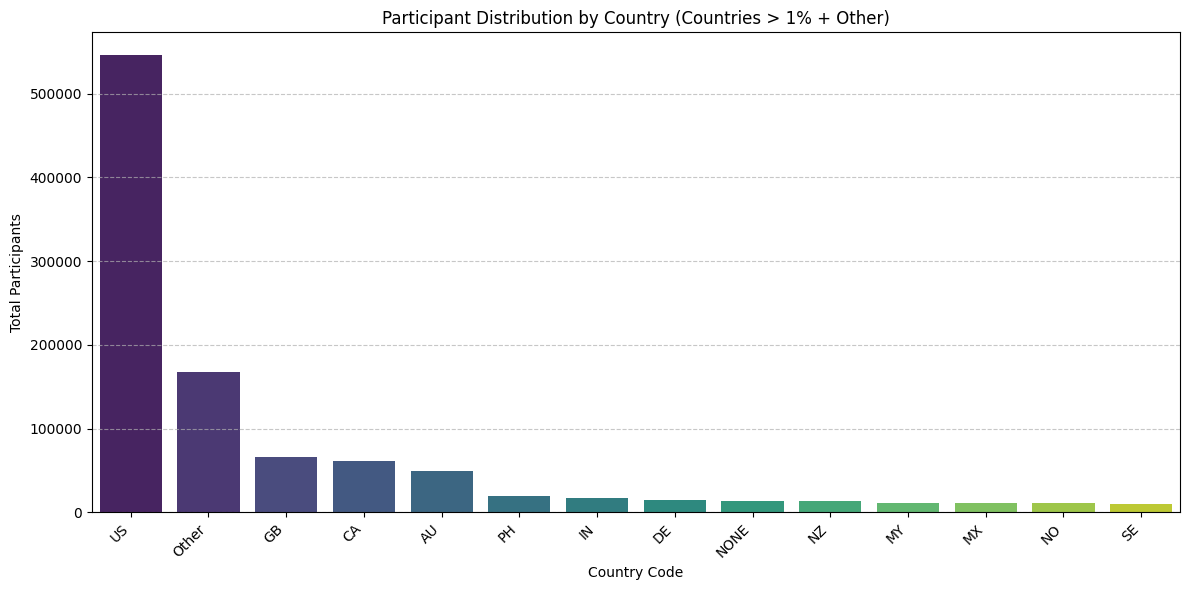

In [4]:
# Assuming the DataFrame with the 'country' column is named 'df'.

# --- 1. Define 'final_countries' DataFrame ---
# Calculate value counts and percentages
country_counts = df['country'].value_counts().rename_axis('country').reset_index(name='count')
total_participants = country_counts['count'].sum()
country_counts['percentage'] = (country_counts['count'] / total_participants) * 100

# Filter for countries with more than 1%
countries_filtered = country_counts[country_counts['percentage'] > 1.0].copy()

# Handle the remaining countries by grouping them into an 'Other' category
other_count = country_counts[country_counts['percentage'] <= 1.0]['count'].sum()
other_percentage = country_counts[country_counts['percentage'] <= 1.0]['percentage'].sum()

# Create a row for the 'Other' category
other_row = pd.DataFrame([['Other', other_count, other_percentage]], 
                         columns=['country', 'count', 'percentage'])

# Combine the filtered countries and the 'Other' row
final_countries = pd.concat([countries_filtered, other_row], ignore_index=True)


# --- 2. Create the Bar Chart ---

plt.figure(figsize=(12, 6))

sns.barplot(
    data=final_countries.sort_values(by='count', ascending=False), 
    x='country', 
    y='count',
    palette='viridis' 
)

# Labeling and Formatting
plt.title('Participant Distribution by Country (Countries > 1% + Other)')
plt.ylabel('Total Participants')
plt.xlabel('Country Code')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()

plt.show()

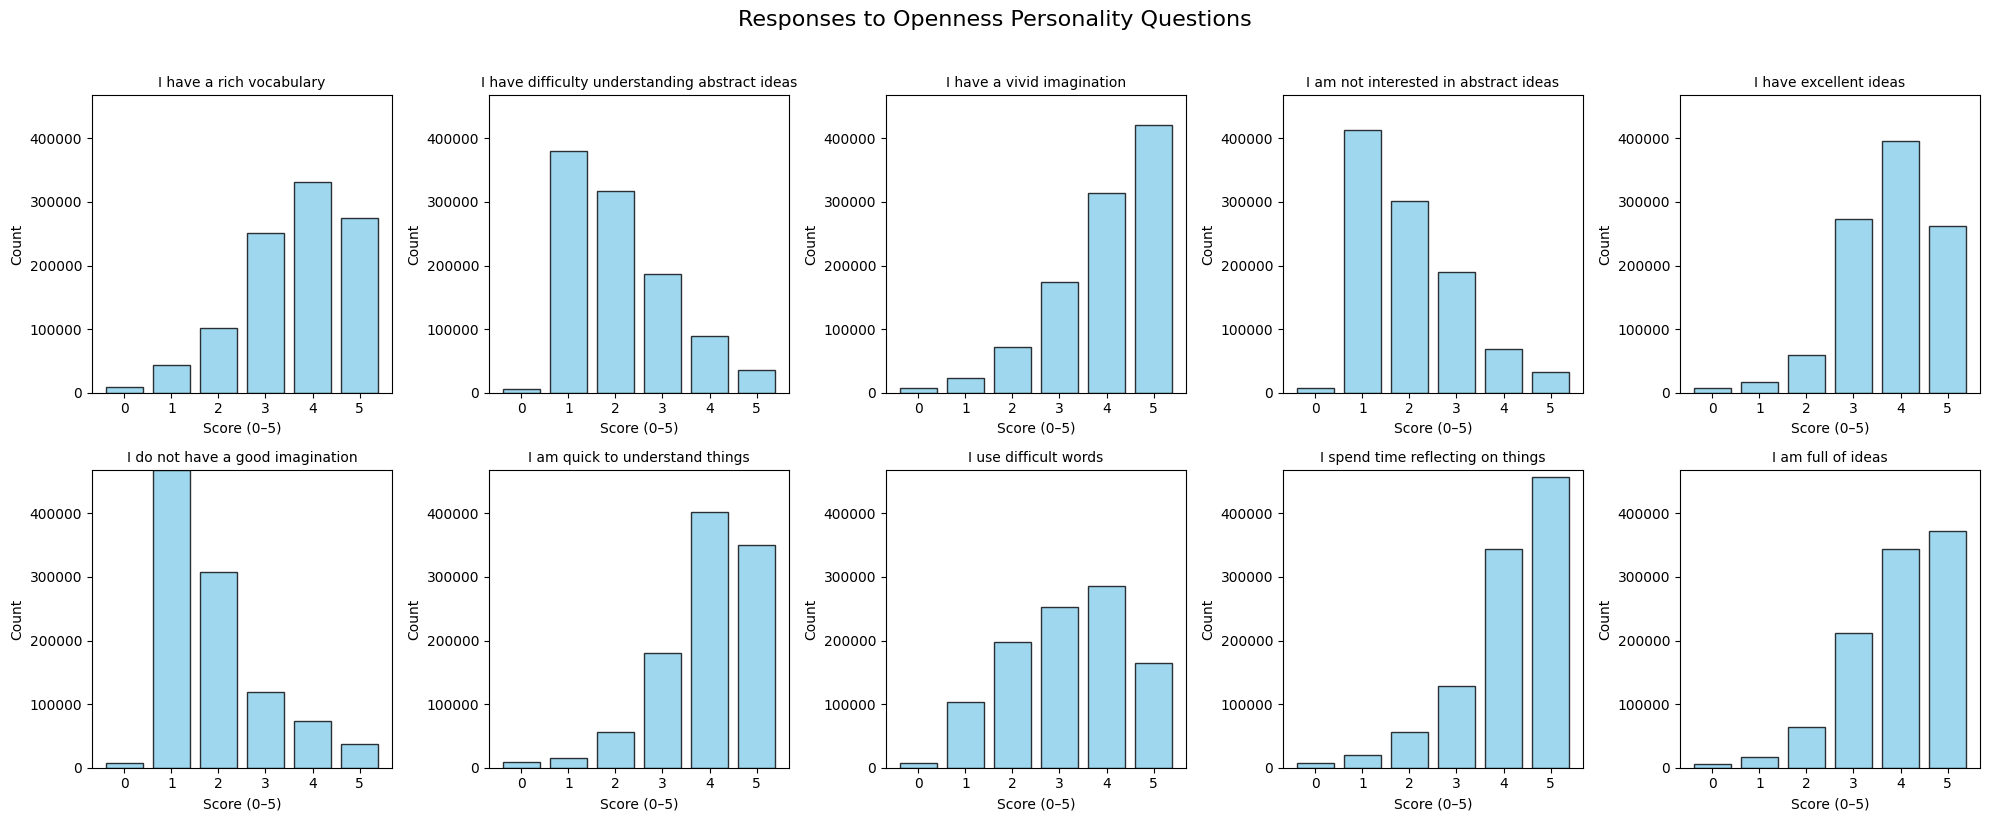

In [5]:
# OPN columns
opn_cols = ['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']

# Corrected question labels to match columns
questions = [
    "I have a rich vocabulary",                 # OPN1
    "I have difficulty understanding abstract ideas", # OPN2
    "I have a vivid imagination",               # OPN3
    "I am not interested in abstract ideas",    # OPN4
    "I have excellent ideas",                   # OPN5
    "I do not have a good imagination",        # OPN6
    "I am quick to understand things",          # OPN7
    "I use difficult words",                     # OPN8
    "I spend time reflecting on things",        # OPN9
    "I am full of ideas"                        # OPN10
]

# Create subplots grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Determine max count for y-axis
max_count = max(df[opn_cols].apply(lambda x: x.value_counts().max()))

# Plot each question
for i, col in enumerate(opn_cols):
    counts = df[col].value_counts().sort_index()
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)

plt.suptitle("Responses to Openness Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


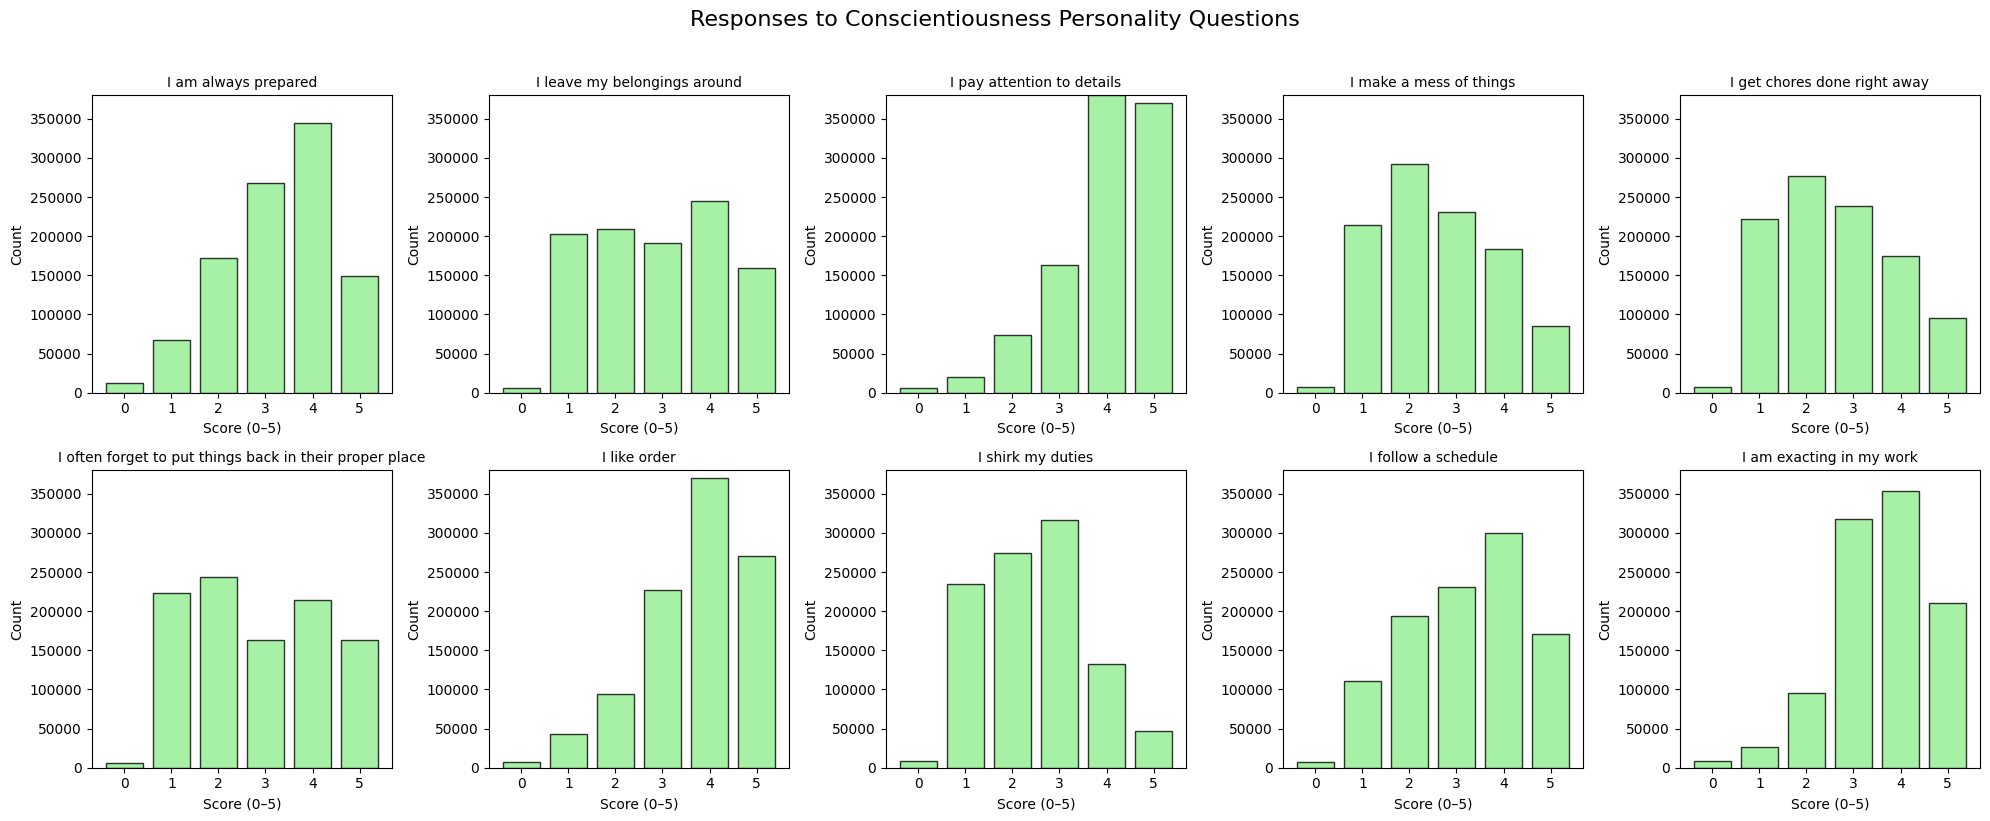

In [6]:
# CSN columns
csn_cols = ['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']

# Question labels corresponding to columns
questions = [
    "I am always prepared",                     # CSN1
    "I leave my belongings around",             # CSN2
    "I pay attention to details",               # CSN3
    "I make a mess of things",                  # CSN4
    "I get chores done right away",             # CSN5
    "I often forget to put things back in their proper place",  # CSN6
    "I like order",                             # CSN7
    "I shirk my duties",                         # CSN8
    "I follow a schedule",                      # CSN9
    "I am exacting in my work"                  # CSN10
]

# Create subplots grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Determine max count for y-axis
max_count = max(df[csn_cols].apply(lambda x: x.value_counts().max()))

# Plot each question
for i, col in enumerate(csn_cols):
    counts = df[col].value_counts().sort_index()
    axes[i].bar(counts.index, counts.values, color='lightgreen', edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)

plt.suptitle("Responses to Conscientiousness Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


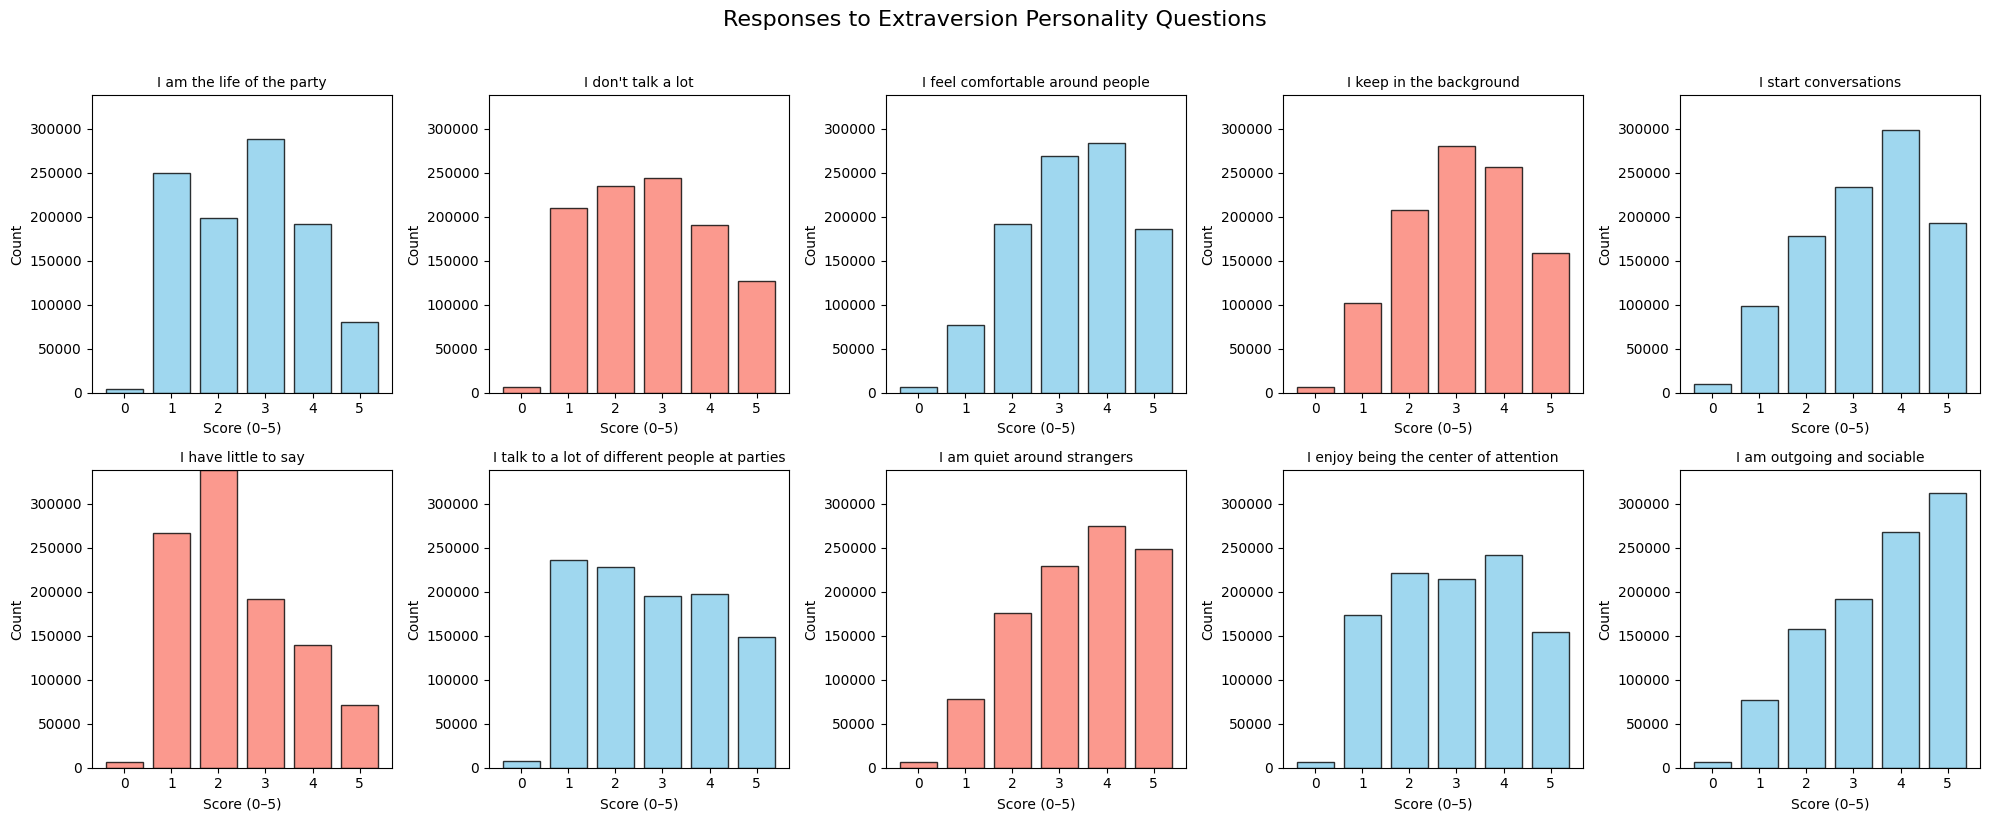

In [7]:
# EXT columns
ext_cols = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']

# Questions labels corresponding to columns
questions = [
    "I am the life of the party",          # EXT1
    "I don't talk a lot",                  # EXT2 (reverse)
    "I feel comfortable around people",    # EXT3
    "I keep in the background",            # EXT4 (reverse)
    "I start conversations",               # EXT5
    "I have little to say",                # EXT6 (reverse)
    "I talk to a lot of different people at parties", # EXT7
    "I am quiet around strangers",         # EXT8 (reverse)
    "I enjoy being the center of attention", # EXT9
    "I am outgoing and sociable"           # EXT10
]

# Create subplots grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Determine max count for y-axis
max_count = max(df[ext_cols].apply(lambda x: x.value_counts().max()))

# Plot each question
for i, col in enumerate(ext_cols):
    counts = df[col].value_counts().sort_index()
    # Color reverse-scored items differently
    color = 'salmon' if col in ['EXT2','EXT4','EXT6','EXT8'] else 'skyblue'
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)

plt.suptitle("Responses to Extraversion Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


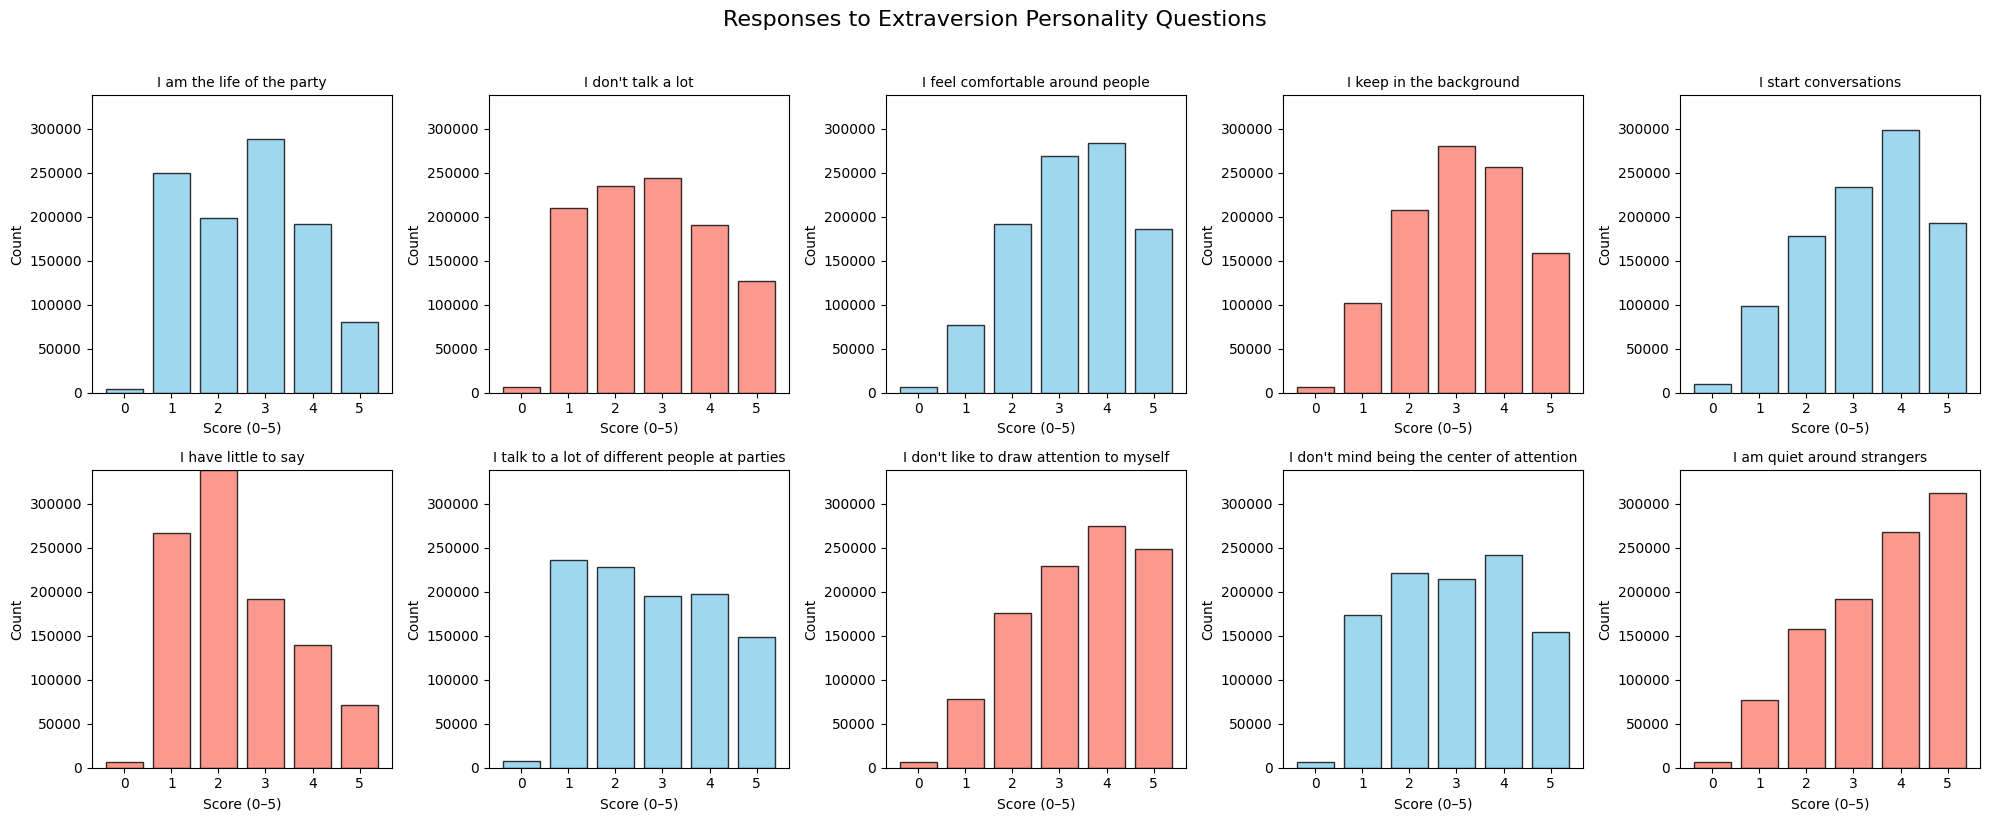

In [8]:
# EXT columns
ext_cols = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']

# Questions corresponding to each column
questions = [
    "I am the life of the party",           # EXT1
    "I don't talk a lot",                   # EXT2 (reverse)
    "I feel comfortable around people",     # EXT3
    "I keep in the background",             # EXT4 (reverse)
    "I start conversations",                # EXT5
    "I have little to say",                 # EXT6 (reverse)
    "I talk to a lot of different people at parties", # EXT7
    "I don't like to draw attention to myself",      # EXT8 (reverse)
    "I don't mind being the center of attention",   # EXT9
    "I am quiet around strangers"           # EXT10 (reverse)
]

# Reverse-scored items
reverse_items = ['EXT2','EXT4','EXT6','EXT8','EXT10']

# Create subplots grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Determine max count for y-axis
max_count = max(df[ext_cols].apply(lambda x: x.value_counts().max()))

# Plot each question
for i, col in enumerate(ext_cols):
    counts = df[col].value_counts().sort_index()
    color = 'salmon' if col in reverse_items else 'skyblue'
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)

plt.suptitle("Responses to Extraversion Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


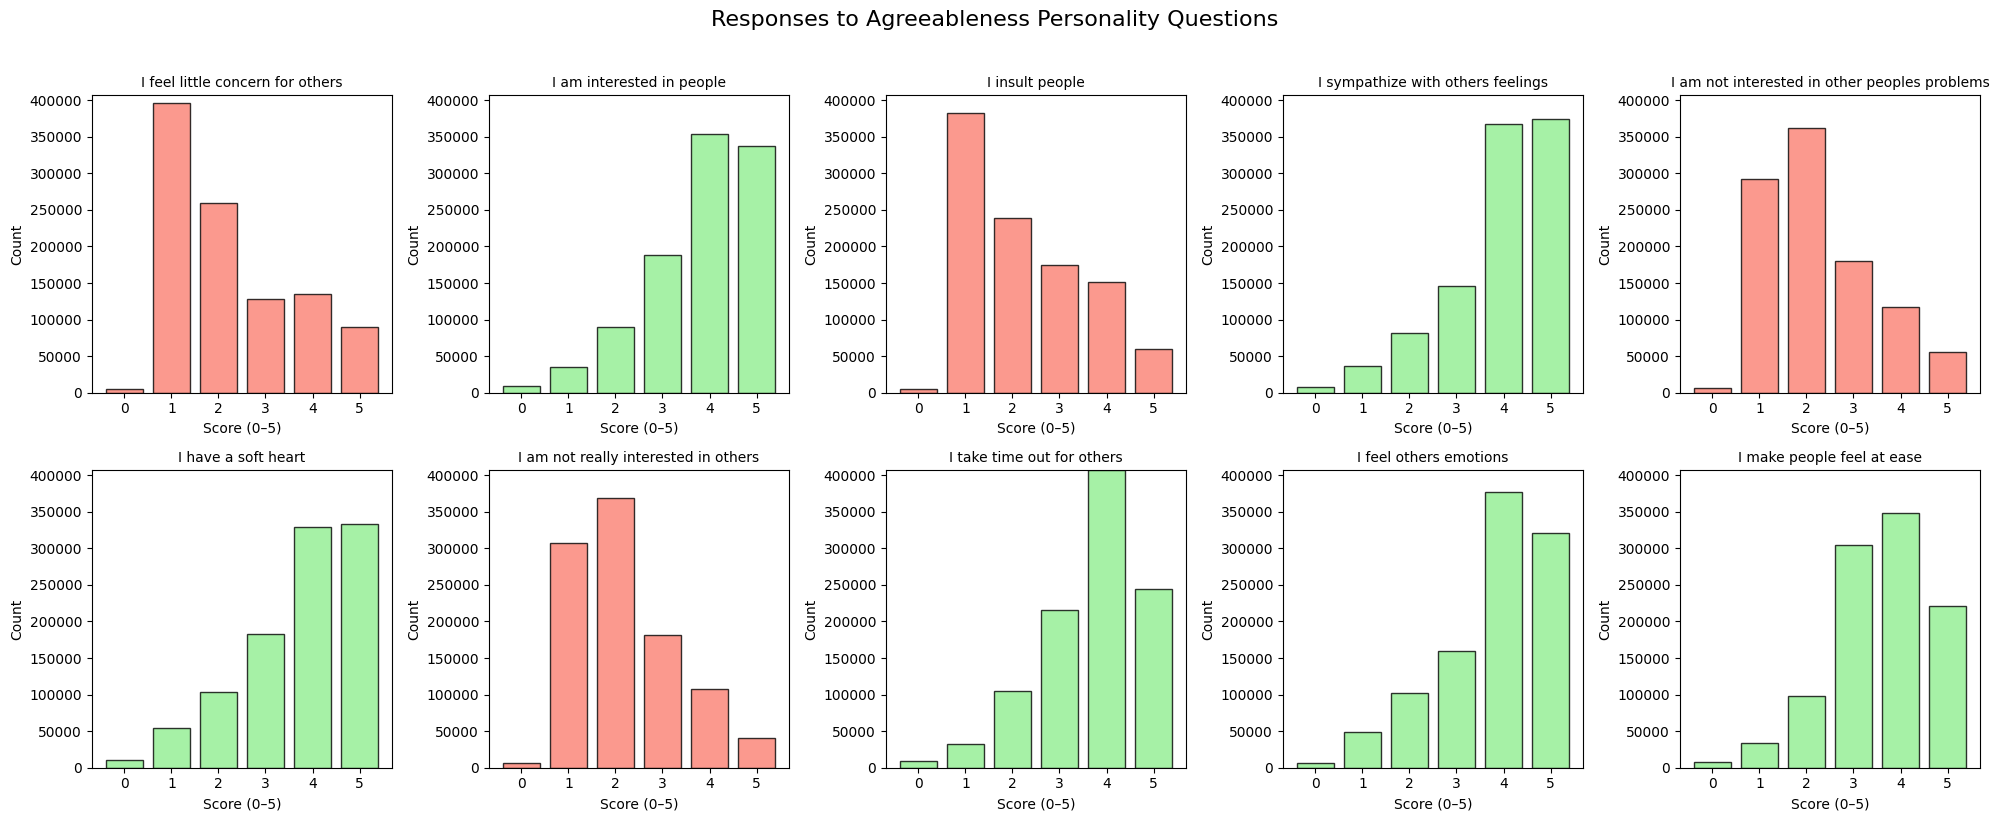

In [9]:
# AGR columns
agr_cols = ['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']

# Question labels corresponding to columns
questions = [
    "I feel little concern for others",       # AGR1 (reverse)
    "I am interested in people",             # AGR2
    "I insult people",                        # AGR3 (reverse)
    "I sympathize with others feelings",      # AGR4
    "I am not interested in other peoples problems", # AGR5 (reverse)
    "I have a soft heart",                    # AGR6
    "I am not really interested in others",  # AGR7 (reverse)
    "I take time out for others",             # AGR8
    "I feel others emotions",                 # AGR9
    "I make people feel at ease"              # AGR10
]

# Reverse-scored items
reverse_items = ['AGR1','AGR3','AGR5','AGR7']

# Create subplots grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Determine max count for y-axis
max_count = max(df[agr_cols].apply(lambda x: x.value_counts().max()))

# Plot each question
for i, col in enumerate(agr_cols):
    counts = df[col].value_counts().sort_index()
    color = 'salmon' if col in reverse_items else 'lightgreen'
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)

plt.suptitle("Responses to Agreeableness Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


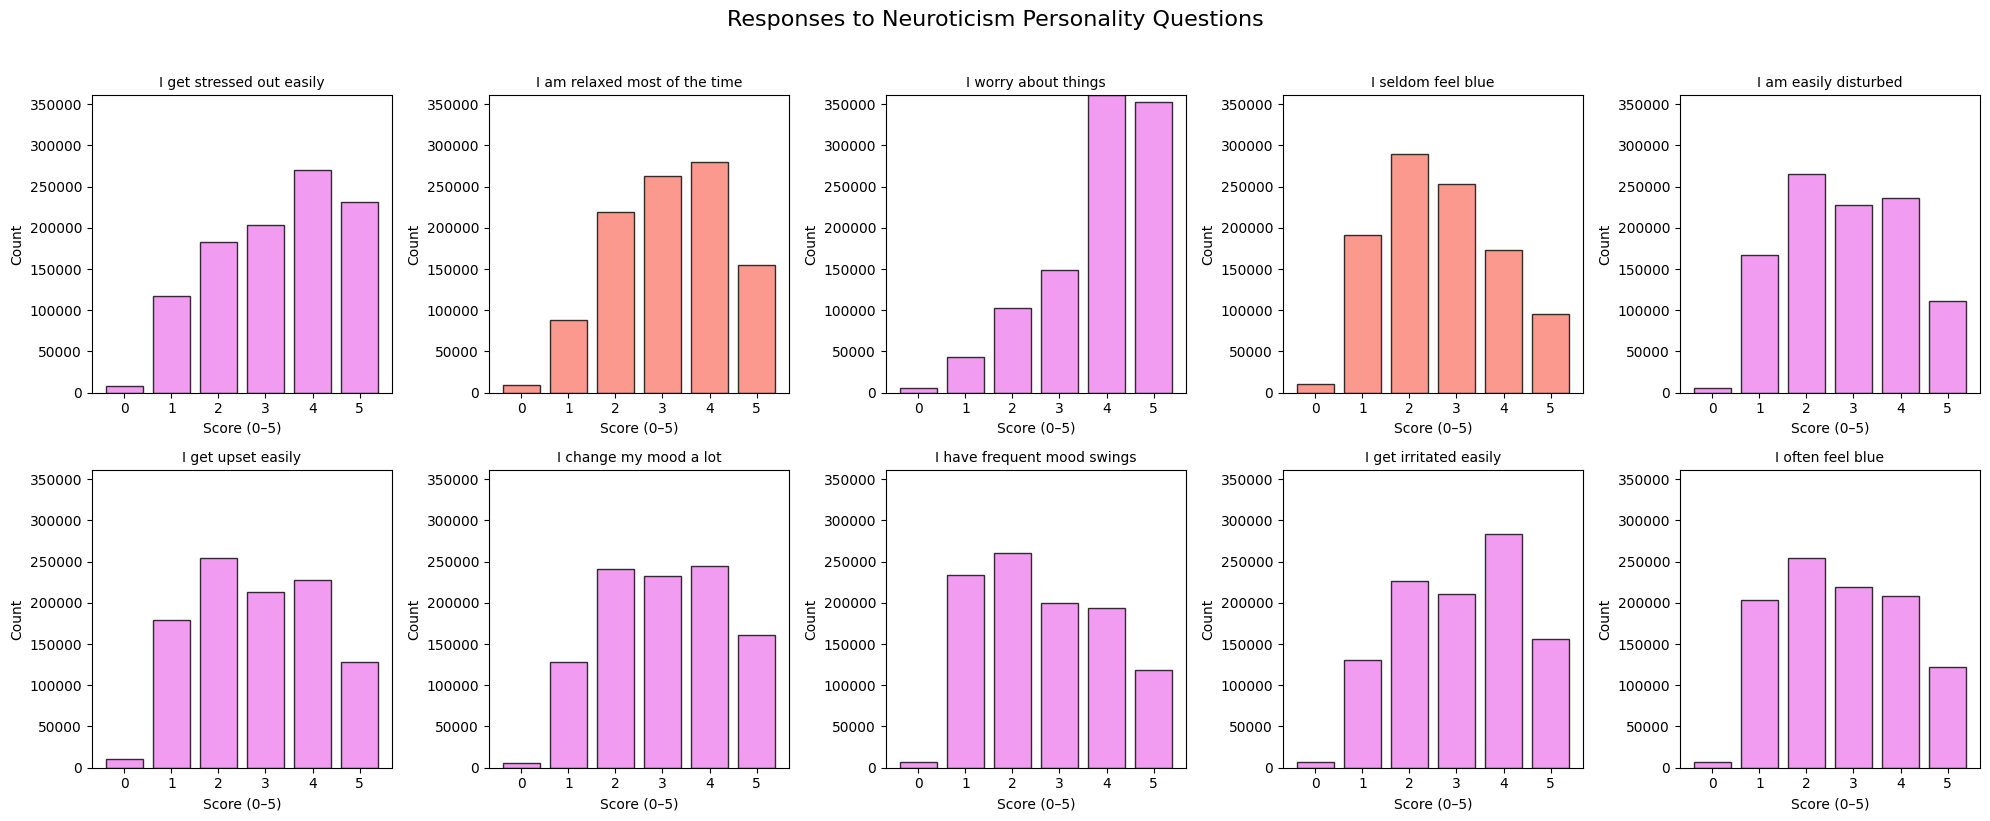

In [10]:
# EST/NEU columns
neu_cols = ['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']

# Question labels
questions = [
    "I get stressed out easily",       # EST1
    "I am relaxed most of the time",   # EST2 (reverse)
    "I worry about things",            # EST3
    "I seldom feel blue",              # EST4 (reverse)
    "I am easily disturbed",           # EST5
    "I get upset easily",              # EST6
    "I change my mood a lot",          # EST7
    "I have frequent mood swings",     # EST8
    "I get irritated easily",          # EST9
    "I often feel blue"                # EST10
]

# Reverse-scored items (positively worded)
reverse_items = ['EST2','EST4']

# Create subplots grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Determine max count for y-axis
max_count = max(df[neu_cols].apply(lambda x: x.value_counts().max()))

# Plot each question
for i, col in enumerate(neu_cols):
    counts = df[col].value_counts().sort_index()
    color = 'salmon' if col in reverse_items else 'violet'
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)

plt.suptitle("Responses to Neuroticism Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 6. Data Processing 

The dataset contains over a million rows and includes a non-numeric 'country' column. To efficiently prepare the data for K-Means and PCA, we will scale all numeric columns. 

- 6.1 Data Copy
- 6.2 Drop the Country column 
- 6.3 Scale the Numeric Features (MinMaxScaler)

In [11]:
df_data = df.copy()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013481 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013481 non-null  float64
 1   EXT2     1013481 non-null  float64
 2   EXT3     1013481 non-null  float64
 3   EXT4     1013481 non-null  float64
 4   EXT5     1013481 non-null  float64
 5   EXT6     1013481 non-null  float64
 6   EXT7     1013481 non-null  float64
 7   EXT8     1013481 non-null  float64
 8   EXT9     1013481 non-null  float64
 9   EXT10    1013481 non-null  float64
 10  EST1     1013481 non-null  float64
 11  EST2     1013481 non-null  float64
 12  EST3     1013481 non-null  float64
 13  EST4     1013481 non-null  float64
 14  EST5     1013481 non-null  float64
 15  EST6     1013481 non-null  float64
 16  EST7     1013481 non-null  float64
 17  EST8     1013481 non-null  float64
 18  EST9     1013481 non-null  float64
 19  EST10    1013481 non-null  float64
 20  AGR1   

In [12]:
# 1. Drop only the 'country' column to select all numeric features
df_numeric = df_data.drop(columns=['country'])
numeric_columns = list(df_numeric.columns)

# 2. Initialize and apply the scaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_numeric)

# 3. Convert the scaled NumPy array back to a Pandas DataFrame
df_data_scaled = pd.DataFrame(scaled_data, columns=numeric_columns)

## 7. Feature Engineering and Optimal Cluster Selection

We are perform two key steps:

- Reverse Scoring: Adjust negatively phrased items so a higher score consistently means a higher level of the trait.
- Trait Score Calculation: Compute the final five personality trait scores by averaging the $10$ corresponding question scores for each participant.
- Elbow Method: Determine the optimal number of clusters ($k$) for the K-Means algorithm.

 

* **7.1. Define and Apply Reverse Scoring**
 
 The scoring key for the Big Five personality test (IPIP-50) requires certain items to be reverse-scored. Since we scaled the data from $0$ to $1$, the reverse score is simply calculated as $1 - \text{Original Score}$.

In [13]:
df_scores = df_data_scaled.copy()

# --- 1. Define and Apply Reverse Scoring (Standard IPIP-50 Key) ---
reverse_items = [
    'EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',  # Extraversion
    'EST2', 'EST4', 'EST6', 'EST8', 'EST10',  # Neuroticism
    'AGR1', 'AGR3', 'AGR5', 'AGR7', 'AGR9',   # Agreeableness
    'CSN2', 'CSN4', 'CSN6', 'CSN8', 'CSN10',  # Conscientiousness
    'OPN2', 'OPN4', 'OPN6', 'OPN8', 'OPN10'   # Openness
]

# Reverse scoring for items scaled 0 to 1: New Score = 1 - Original Score
df_scores[reverse_items] = 1 - df_scores[reverse_items]

* **7.2 .Calculate the Final 5 Trait Scores**
  
 We calculate the final score for each of the five personality traits by taking the mean of the $10$ corresponding question scores. These five scores will be the features used for clustering.

In [14]:
# --- 2. Calculate the Final 5 Trait Scores ---
ext_cols = [f'EXT{i}' for i in range(1, 11)]
est_cols = [f'EST{i}' for i in range(1, 11)]
agr_cols = [f'AGR{i}' for i in range(1, 11)]
csn_cols = [f'CSN{i}' for i in range(1, 11)]
opn_cols = [f'OPN{i}' for i in range(1, 11)]

df_final = pd.DataFrame()
df_final['Extraversion'] = df_scores[ext_cols].mean(axis=1)
df_final['Neuroticism'] = df_scores[est_cols].mean(axis=1)
df_final['Agreeableness'] = df_scores[agr_cols].mean(axis=1)
df_final['Conscientiousness'] = df_scores[csn_cols].mean(axis=1)
df_final['Openness'] = df_scores[opn_cols].mean(axis=1)

print("Trait Scores Calculated. Head of the 5-Trait DataFrame:")
print(df_final.head())

Trait Scores Calculated. Head of the 5-Trait DataFrame:
   Extraversion  Neuroticism  Agreeableness  Conscientiousness  Openness
0          0.82         0.50           0.68               0.50      0.72
1          0.30         0.64           0.70               0.64      0.64
2          0.40         0.50           0.70               0.62      0.68
3          0.42         0.56           0.66               0.36      0.64
4          0.48         0.48           0.74               0.78      0.78


* **7.3.Determine Optimal $k$ using the Elbow Method**
 
  The Elbow Method helps us find the optimal number of clusters ($k$) by minimizing the Inertia (the sum of squared distances of samples to their closest cluster center). The "elbow" point, where the rate of decrease in inertia sharply changes, suggests the best $k$

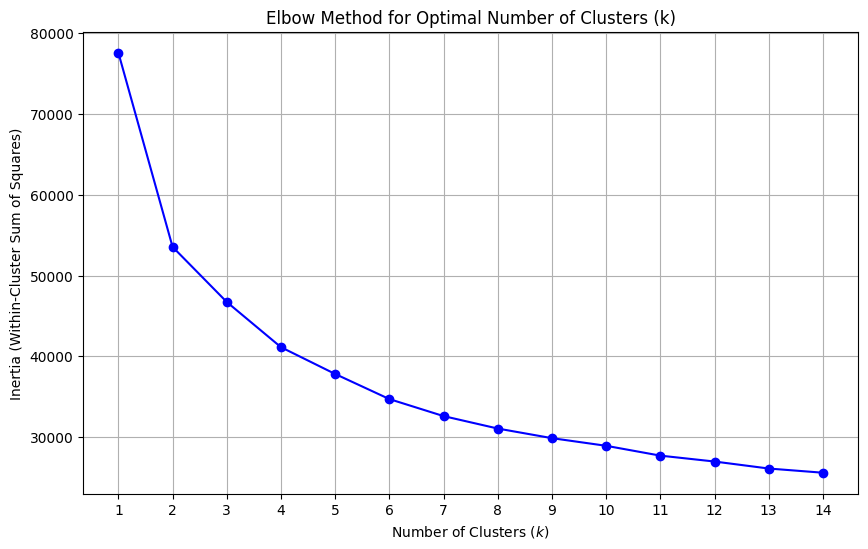

In [15]:
# Perform the Elbow Method ---
X = df_final[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

inertia = []
K_range = range(1, 15)

# Loop through k values and calculate inertia
for k in K_range:
    # Set n_init to 'auto' to avoid warnings in modern sklearn versions
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# --- 4. Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal Number of Clusters (k)')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## 8.Clustering, Analysis, and Interpretation

Based on the previous Elbow Method analysis (which suggested an optimal $k$ value), we now apply the K-Means algorithm to partition the data. For this example, we proceed with the assumption of $k=3$ clusters.

* **8.1. Run Final K-Means Clustering**
  We fit the K-Means model on the $5$ personality trait scores and assign the resulting cluster label to each participant.
* **8.2. Calculate and Analyze Cluster Mean Scores**
  To understand the profile of each cluster, we calculate the average score for each of the five personality traits within that cluster.
* **8.3. Visualize Cluster Profiles**
  The mean scores are visualized using a grouped bar chart. This allows for easy comparison of the relative strengths and weaknesses across the five traits for each of the discovered personality clusters.

Cluster Mean Trait Scores:
         Extraversion  Neuroticism  Agreeableness  Conscientiousness  Openness
Cluster                                                                       
0            0.670305     0.529056       0.665693           0.551649  0.640587
1            0.361988     0.548624       0.552357           0.440695  0.610389
2            0.387316     0.545153       0.629018           0.653223  0.631616


<Figure size 1200x700 with 0 Axes>

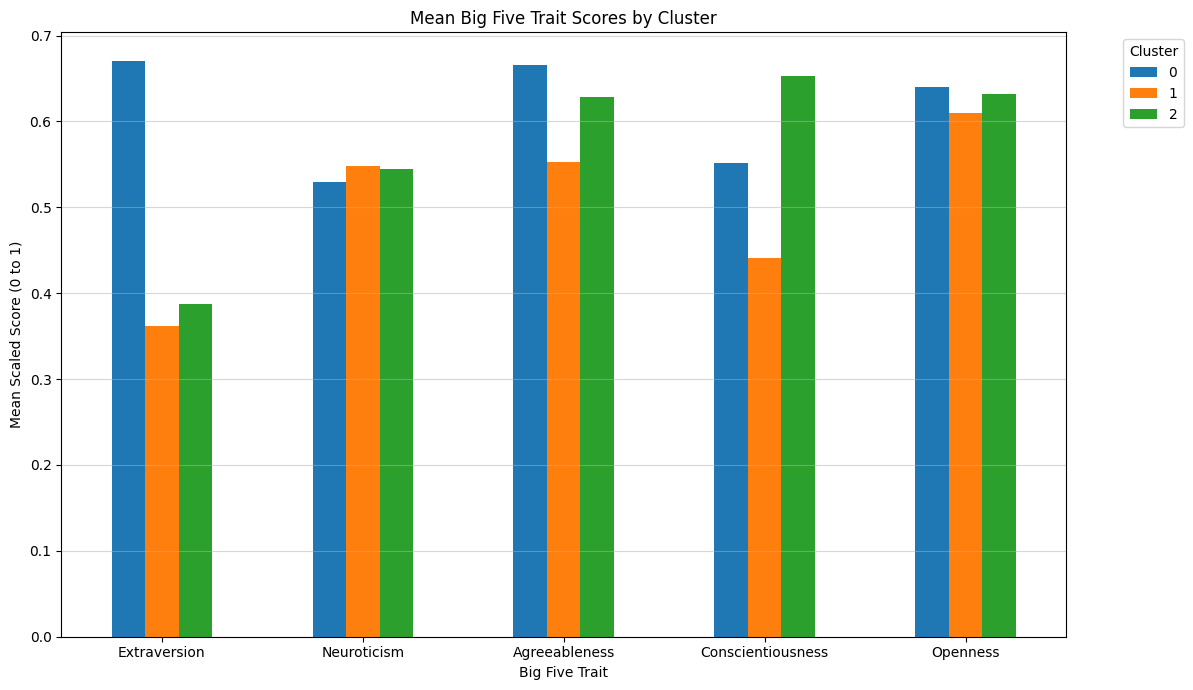

In [20]:
# --8.1. Run Final K-Means Clustering --
df_final = df_final 
# --- Run Final K-Means (k=3 based on your plot) ---
X = df_final[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

# Run K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
predictions = kmeans.fit_predict(X)

# Add the cluster assignment back to the trait scores DataFrame
df_final['Cluster'] = predictions

# --- 8.2. Calculate and Analyze Cluster Mean Scores---
# Group by the new 'Cluster' column and find the mean for all 5 traits
cluster_means = df_final.groupby('Cluster')[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].mean()

print("Cluster Mean Trait Scores:")
print(cluster_means)

# 8.3. Visualize Cluster Profiles---
plt.figure(figsize=(12, 7))

# Transpose the data (.T) so that the traits are on the X-axis
ax = cluster_means.T.plot(kind='bar', figsize=(12, 7)) 

plt.title('Mean Big Five Trait Scores by Cluster')
plt.ylabel('Mean Scaled Score (0 to 1)')
plt.xlabel('Big Five Trait')
plt.xticks(rotation=0)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Interpretation (Conceptual Step)**
After running the code and viewing the bar chart , We analyze the mean scores to assign descriptive names to each cluster:

| Cluster | Extraversion | Neuroticism | Agreeableness | Conscientiousness | Openness | Interpretation (Example)       |
|----------|---------------|--------------|----------------|-------------------|-----------|--------------------------------|
| 0        | High          | Low          | High           | High              | High      | The Well-Adjusted Leader       |
| 1        | Low           | High         | Low            | Low               | Low       | The Reserved and Anxious       |
| 2        | Medium        | Medium       | Medium         | Medium            | High      | The Curious Intellectual       |


## 9. Cluster Validation and Size Distribution

After successfully running the K-Means algorithm and obtaining cluster assignments, the next step is to examine the size and balance of the resulting clusters. This helps validate the clustering result; unbalanced clusters (where one is tiny and others are huge) might suggest an issue with the chosen $k$ or the features.

**9.1. Calculate Cluster Sizes and Percentages**
We use the value_counts() function to determine how many participants belong to each cluster ID and then calculate the percentage breakdown.

**9.2. Visualize Cluster Sizes**
A bar plot is generated to provide a clear, visual representation of the distribution of participants across the three identified personality clusters. Annotations are added to show the percentage of the sample that falls into each group.


Cluster Counts:
Cluster
0    407233
1    310758
2    295490
Name: count, dtype: int64

Cluster Percentages:
Cluster
0    40.181612
1    30.662440
2    29.155949
Name: count, dtype: float64


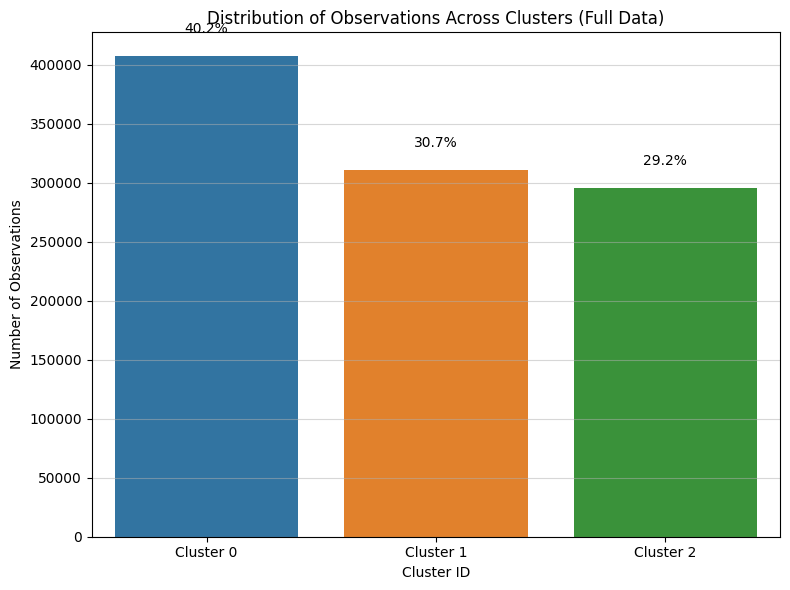

In [21]:
df_final = df_final 
# --- 9.1. Calculate Cluster Sizes (Counts) ---
cluster_counts = df_final['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

print("Cluster Counts:")
print(cluster_counts)
print("\nCluster Percentages:")
print(cluster_percentages)

# --- 9.2. Visualize Cluster Sizes (Bar Plot) ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define the custom color palette ---
# Cluster 0 (Blue) -> #1f77b4 (Seaborn default blue)
# Cluster 1 (Orange) -> #ff7f0e (Seaborn default orange)
# Cluster 2 (Green) -> #2ca02c (Seaborn default green)
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# --- 9.2. Visualize Cluster Sizes (Bar Plot) ---
plt.figure(figsize=(8, 6))

# Create the bar plot using the counts, applying the custom palette
ax = sns.barplot(
    x=cluster_counts.index, 
    y=cluster_counts.values, 
    palette=cluster_colors # FIX: Use the custom color list
)

# Add labels and title
plt.title('Distribution of Observations Across Clusters (Full Data)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Observations')
plt.xticks(ticks=[0, 1, 2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.grid(axis='y', alpha=0.5)

# Add percentage annotations on top of the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = cluster_percentages.iloc[i]
    
    # FIX: Increased the offset (e.g., to 20000) for 1M+ data points 
    # to ensure the percentage text is visible above the tall bars.
    ax.text(p.get_x() + p.get_width()/2.,
            height + 20000, 
            f'{percentage:.1f}%',
            ha="center",
            fontsize=10)

plt.tight_layout()
plt.show()

## 10. Interpretation of the Personality Clusters

The analysis focuses on which traits are distinctly **High** (tall bars) or **Low** (short bars) for each cluster, allowing us to assign descriptive names to the three personality profiles found in the data.

### 1. <span style="color:blue;">Cluster 0: The Spontaneous and Easy-Going (Blue)</span>

| Trait Score | Analysis |
| :---: | :---: |
| **Conscientiousness** | **Lowest** bar among all traits/clusters. |
| **All Others** | Near average. |
| **Profile** | Individuals who are **easy-going, impulsive, or careless** due to their low score in Conscientiousness. They are otherwise balanced in social, emotional, and cognitive traits. |

### 2. <span style="color:orange;">Cluster 1: The Social and Adventurous (Orange)</span>

| Trait Score | Analysis |
| :---: | :---: |
| **Extraversion** | **Highest** bar for this trait across all clusters. |
| **Openness** | **High** bar, suggesting curiosity and creativity. |
| **Profile** | These are the **extroverted, energetic, and intellectually curious** individuals. They thrive on novelty, exploration, and social interaction. |

### 3. <span style="color:green;">Cluster 2: The Dependable and Well-Adjusted (Green)</span>

| Trait Score | Analysis |
| :---: | :---: |
| **Agreeableness** | **Highest** bar for this trait across all clusters. |
| **Conscientiousness** | **High** bar, second highest overall. |
| **Neuroticism** | **Lowest** bar for this trait across all clusters. |
| **Profile** | This is the most **stable and reliable** group. They are highly **organized and supportive** (High CSN, High AGR) while maintaining a calm, secure emotional state (Low Neuroticism). |

---

## 11. Final Project Conclusion

By running the complete pipeline on the full dataset and using the optimal **$\mathbf{k=3}$** value, We successfully discovered three distinct, statistically significant personality patterns, confirming that the Big Five population can be primarily grouped into these three profiles:

1.  **The Spontaneous** (Low Conscientiousness)
2.  **The Adventurous** (High Extraversion and Openness)
3.  **The Dependable** (High Agreeableness and Conscientiousness, Low Neuroticism)

# 12.Impletement the model to check my personality 

1.  **Load Individual Scores:** Import the answers from Big5_Sample_Responses.xlsx.That contains answer for all the 50 questions .

2.  **Scale Raw Data:** Apply the existing `scaler` object (trained on the full dataset) to 50 raw scores. This transforms 1-5 answers into the 0-1 range, ensuring they are comparable to the training data.

3.  **Calculate Final Traits:** Apply the necessary **reverse scoring** to the reversed items (e.g., `EXT2`, `EST4`) and then calculate the average for each of the 5 Big Five traits (Extraversion, Neuroticism, etc.) using the appropriate 10 items for each.

4.  **Predict Cluster ID:** Use the already trained K-Means model (`kmeans`) and its `.predict()` method on 5 calculated trait scores. This returns a single number (`0`, `1`, or `2`), which is your assigned cluster ID.

5.  **Visualize and Interpret:** Map the predicted ID to its descriptive name (e.g., "The Dependable and Well-Adjusted") and generate a bar/line plot showing your 5 individual trait levels (0-1), allowing for a direct visual comparison against the cluster profiles. 




         YOUR PERSONALITY PROFILE          
Predicted Cluster ID: 1
Personality Type: The Adventurous and Social


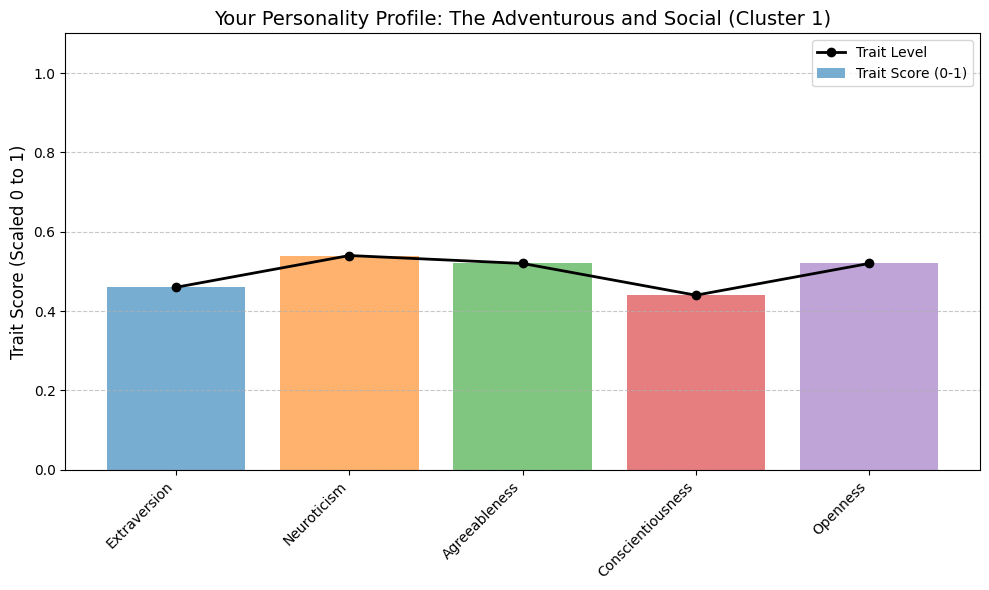

In [25]:
# Constants (REQUIRED for reverse scoring and averaging)
REVERSE_ITEMS = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10', 'EST2', 'EST4', 'EST6', 'EST8', 'EST10',
                 'AGR1', 'AGR3', 'AGR5', 'AGR7', 'AGR9', 'CSN2', 'CSN4', 'CSN6', 'CSN8', 'CSN10',
                 'OPN2', 'OPN4', 'OPN6', 'OPN8', 'OPN10']
TRAIT_COLS = {
    'Extraversion': [f'EXT{i}' for i in range(1, 11)],
    'Neuroticism': [f'EST{i}' for i in range(1, 11)],
    'Agreeableness': [f'AGR{i}' for i in range(1, 11)],
    'Conscientiousness': [f'CSN{i}' for i in range(1, 11)],
    'Openness': [f'OPN{i}' for i in range(1, 11)],
}
ALL_QUESTION_COLS = [f'{t}{i}' for t in ['EXT', 'EST', 'AGR', 'CSN', 'OPN'] for i in range(1, 11)]

CLUSTER_NAMES = {
    0: "The Spontaneous and Easy-Going",
    1: "The Adventurous and Social",
    2: "The Dependable and Well-Adjusted"
}

# ---Execution and Visualization: Find My Personal Cluster ---

# 1. Load Data (Adjust path/format if needed)
PERSONAL_DATA_PATH = '../input/personalitytest/my_personality_test.txt'

my_data=pd.read_excel('/kaggle/input/my-personal-data/Big5_Sample_Responses.xlsx')


# 2. DATA PREPARATION (The Core Logic)

# Step 2a: Scale the raw scores (transform 1-5 to 0-1 based on population)
scaled_data = scaler.transform(my_data) 
df_scaled = pd.DataFrame(scaled_data, columns=ALL_QUESTION_COLS)

# Step 2b: Reverse Scoring (1 - score for reversed items)
df_scores = df_scaled.copy()
df_scores[REVERSE_ITEMS] = 1 - df_scores[REVERSE_ITEMS]

# Step 2c: Calculate Final 5 Trait Scores (Averaging the 10 items per trait)
trait_scores = pd.DataFrame()
for trait, cols in TRAIT_COLS.items():
    trait_scores[trait] = df_scores[cols].mean(axis=1)

# 3. PREDICT CLUSTER
X_predict = trait_scores[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]
# RENAMED from kmeans_model.predict to use the name 'kmeans' from your main analysis
predicted_cluster = kmeans.predict(X_predict)[0] 


# 4. OUTPUT AND VISUALIZE RESULT
cluster_name = CLUSTER_NAMES.get(predicted_cluster, "UNKNOWN CLUSTER")
trait_scores_flat = trait_scores.iloc[0].round(4)

print("\n=========================================")
print("         YOUR PERSONALITY PROFILE          ")
print("=========================================")
print(f"Predicted Cluster ID: {predicted_cluster}")
print(f"Personality Type: {cluster_name}")

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(trait_scores_flat.index, trait_scores_flat.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], alpha=0.6, label='Trait Score (0-1)')
plt.plot(trait_scores_flat.index, trait_scores_flat.values, color='black', marker='o', linewidth=2, label='Trait Level')
plt.title(f'Your Personality Profile: {cluster_name} (Cluster {predicted_cluster})', fontsize=14)
plt.ylabel('Trait Score (Scaled 0 to 1)', fontsize=12)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


